# MVP

In [4]:
import pandas as pd
import numpy as np

In [11]:
# read data
data = pd.read_csv('Data/Data Merged.csv')
data.head()

,UNITID,EFFYLEV,LSTUDY,XEYTOTLT,EFYTOTLT,XEYTOTLM,EFYTOTLM,XEYTOTLW,EFYTOTLW,XEFYAIAT,...,GRWHITW_rate,GR2MORT_rate,GR2MORM_rate,GR2MORW_rate,GRUNKNT_rate,GRUNKNM_rate,GRUNKNW_rate,GRNRALT_rate,GRNRALM_rate,GRNRALW _rate
0,100654,2,1,R,5207,R,2286,R,2921,R,...,0.500000,0.333333,0.333333,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,100663,2,1,R,13308,R,5528,R,7780,R,...,0.597701,0.444444,0.346154,0.500000,0.454545,0.500000,0.0,0.590909,0.461538,0.777778
2,100706,2,1,R,7519,R,4287,R,3232,R,...,0.538012,0.666667,0.000000,1.000000,0.551724,0.526316,0.6,0.571429,0.615385,0.000000
3,100724,2,1,R,5229,R,2024,R,3205,R,...,0.200000,0.000000,0.000000,0.000000,0.333333,0.000000,0.5,0.428571,0.400000,0.500000
4,100751,2,1,R,35625,R,15883,R,19742,R,...,0.728270,0.604839,0.568627,0.630137,1.000000,0.000000,1.0,0.729323,0.717647,0.750000


In [5]:
# creating training and holdout set
from sklearn.model_selection import train_test_split
data_291_national_universities = data.dropna()
data_291_national_universities.shape
np.random.seed(922)
train, test = train_test_split(data_291_national_universities, test_size = 0.3)

In [30]:
# MVP, good_for_intl ~ diversity index + intl_pct
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(penalty='l2')
logit_model.fit(X = train[['intl_pct','diverse_ind']], y = train['good_for_intl_US_news'])
logit_fit = logit_model.predict(test[['intl_pct','diverse_ind']])


C:\Users\Ning\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
# try another way that shows significance
import statsmodels.api as sm
logit_model=sm.Logit(train['good_for_intl_US_news'],train[['intl_pct','diverse_ind']])
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.634044
         Iterations 6
                             Logit Regression Results                            
Dep. Variable:     good_for_intl_US_news   No. Observations:                  202
Model:                             Logit   Df Residuals:                      200
Method:                              MLE   Df Model:                            1
Date:                   Mon, 23 Sep 2019   Pseudo R-squ.:                 0.06116
Time:                           13:09:11   Log-Likelihood:                -128.08
converged:                          True   LL-Null:                       -136.42
                                           LLR p-value:                 4.409e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intl_pct        0.1508      0.043      3.539      0.000       0.067       0.234
di

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report
logit_mat = confusion_matrix(y_true = test['good_for_intl_US_news'], y_pred = logit_fit)
print(logit_mat)
print("training accuracy:\n", logit_model.score(train[['intl_pct','diverse_ind']], train['good_for_intl_US_news']))
print("testing accuracy:\n", logit_model.score(test[['intl_pct','diverse_ind']], test['good_for_intl_US_news']))

[[16 21]
 [ 8 42]]
training accuracy:
 0.7128712871287128
testing accuracy:
 0.6666666666666666


In [ ]:
# cross validation
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

# success measures

Text(0.5, 0, 'graduation rate')

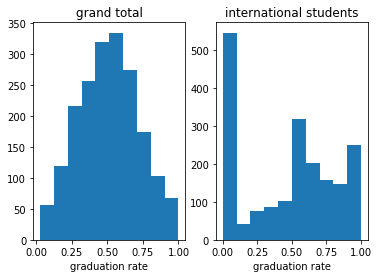

In [15]:
#'GRTOTLT', 'GRNRALT'
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.hist(data['GRTOTLT_rate'])
plt.title('grand total')
plt.xlabel('graduation rate')
plt.subplot(1,2,2)
plt.hist(data['GRNRALT_rate']) 
plt.title('international students')
plt.xlabel('graduation rate') 
# seems like a fair number of schools don't have international students enrolled for the class of 2017 (or 2015 or whatever)

In [21]:
# only include those who have a international graduating class of 2015
data_intl_grad = data[data.GRNRALT_y > 0]
data_intl_grad.shape # (1535, 300)

(282, 300)


C:\Users\Ning\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


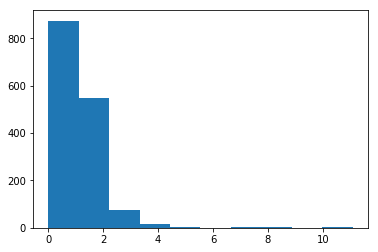

In [24]:
# calculate the ratio of intl to grand total
grad_ratio = data_intl_grad['GRNRALT_rate']/data_intl_grad['GRTOTLT_rate']
plt.hist(grad_ratio) # later on, need to get rid of sample sizes that are particularly small
data_intl_grad['grad_ratio'] = grad_ratio

In [25]:
data_282_intl_grad_national_u = data_intl_grad.dropna()
print(data_282_intl_grad_national_u.shape) # (282, 300)
np.random.seed(922)
train2, test2 = train_test_split(data_282_intl_grad_national_u, test_size = 0.3)

(282, 301)


In [26]:
logit_2 = LogisticRegression(penalty='l2')
logit_2.fit(X = train2[['intl_pct','diverse_ind','grad_ratio']], y = train2['good_for_intl_US_news'])
logit_fit2 = logit_2.predict(test2[['intl_pct','diverse_ind','grad_ratio']])

C:\Users\Ning\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report
logit_mat2 = confusion_matrix(y_true = test2['good_for_intl_US_news'], y_pred = logit_fit2)
print(logit_mat2)
print("training accuracy:\n", logit_2.score(train2[['intl_pct','diverse_ind','grad_ratio']], train2['good_for_intl_US_news']))
print("testing accuracy:\n", logit_2.score(test2[['intl_pct','diverse_ind','grad_ratio']], test2['good_for_intl_US_news']))

[[ 5 32]
 [ 0 48]]
training accuracy:
 0.6548223350253807
testing accuracy:
 0.6235294117647059
